# Basic Adaptive Policy Trial

In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
import matplotlib.pyplot as plt

In [14]:
%cd ..
from src import simulation
from src.examples import load_basic_simulation, load_sinot_simulation
from src.policy import ConstantPolicy, FixedPolicy

/Users/dominikmeier/Nextcloud/Studium


In [15]:
simulation = load_basic_simulation()

In [16]:
simulation.step()

In [17]:
simulation.history

History(observations=[Observation(context={'c': -4.686714473255527}, treatment=Treatment(i=1.0), outcome=Outcome())])

<Axes: ylabel='primary_outcomes'>

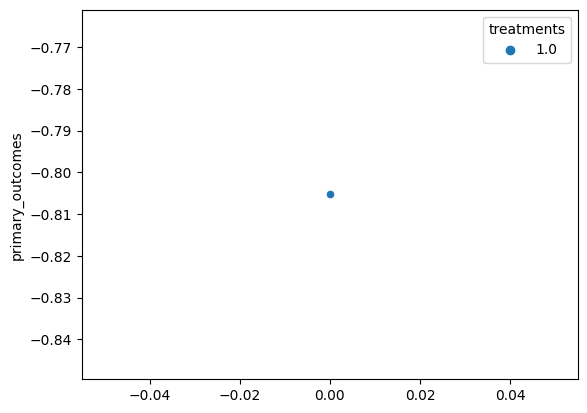

In [18]:
ax = plt.axes()
simulation.history.plot(ax)

/Users/dominikmeier/Nextcloud/Studium/MT/WIP/code


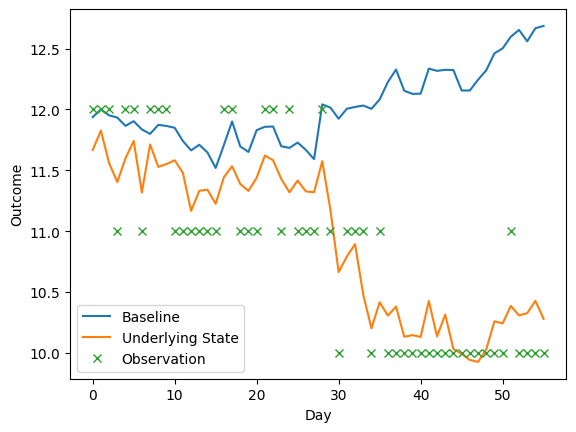

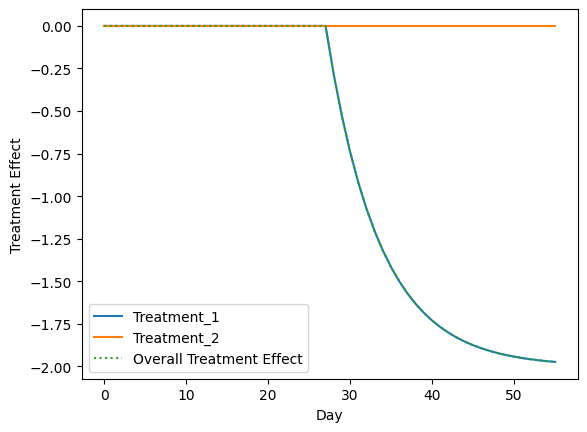

In [19]:
import json

%cd /Users/dominikmeier/Nextcloud/Studium/MT/WIP/code
from sinot.simulation import Simulation as SinotSimulation

# Load example params
with open("sinot/example/example_params.json") as fp:
    study_params = json.load(fp)

# Drop out fraction to simulate drop out
drop_out = {"fraction": 1, "vacation": 0}

# study design defines the order of treatmens. None indicates no-treatment was given
treatment = "Treatment_1"
days_per_period = 28

sim = SinotSimulation(study_params)
pat_complete, _ = sim.step_patient(
    None, days_per_period, drop_out=drop_out, first_day="2018-01-01"
)
pat_complete, _ = sim.step_patient(
    "Treatment_1", days_per_period, drop_out=drop_out, data=pat_complete
)

sim.plot_patient(pat_complete)

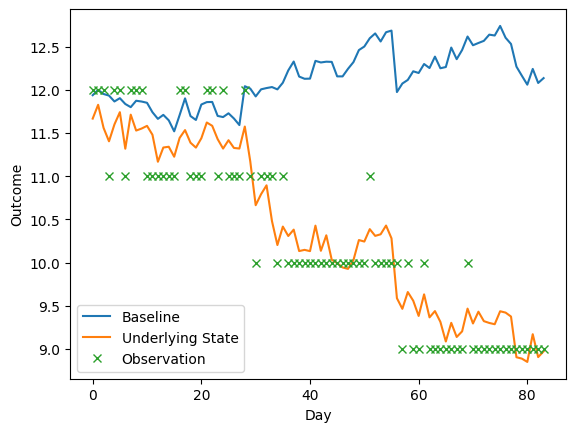

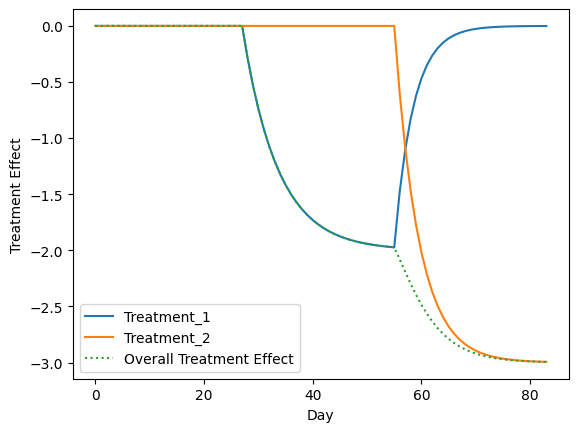

In [20]:
pat_complete, _ = sim.step_patient(
    "Treatment_2", days_per_period, drop_out=drop_out, data=pat_complete
)
sim.plot_patient(pat_complete)

In [21]:
pat_complete.iloc[-1:]

,patient_id,block,date,day,treatment,Activity,Treatment_1,Treatment_1_effect,Treatment_2,Treatment_2_effect,baseline_drift,underlying_state,Uncertain_Low_Back_Pain
83,0,3,2018-03-25,84,Treatment_2,3383.636907,0.0,-0.000626,1.0,-2.994197,12.135521,8.971515,9.0


# SinotSimulation

In [22]:
%cd /Users/dominikmeier/Nextcloud/Studium/MT/WIP/code
simulation_1 = load_sinot_simulation(
    file_path="sinot/example/example_params.json",
    policy=ConstantPolicy(action=1, number_of_actions=2),
)
simulation_2 = load_sinot_simulation(
    file_path="sinot/example/example_params.json",
    policy=ConstantPolicy(action=2, number_of_actions=2),
)
simulation_fixed = load_sinot_simulation(
    file_path="sinot/example/example_params.json",
    policy=FixedPolicy(number_of_actions=2, block_length=28),
)

/Users/dominikmeier/Nextcloud/Studium/MT/WIP/code


In [24]:
for _ in range(100):
    simulation_1.step()
    simulation_2.step()
    simulation_fixed.step()

<Axes: ylabel='primary_outcomes'>

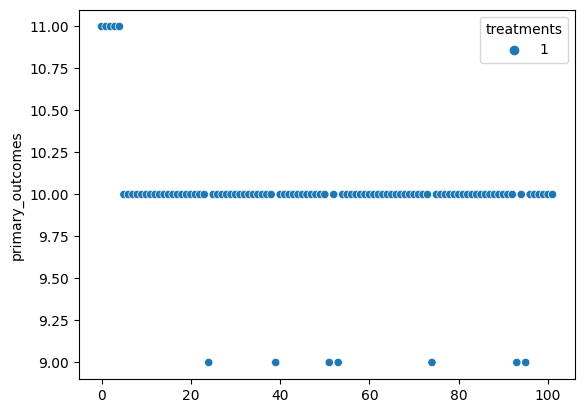

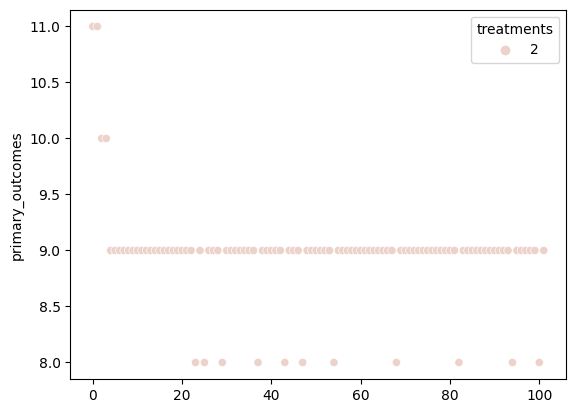

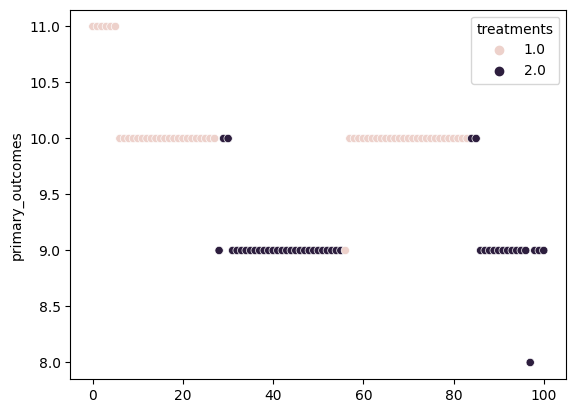

In [25]:
ax = plt.axes()
simulation_1.history.plot(ax)
plt.figure()
ax = plt.axes()
simulation_2.history.plot(ax)
plt.figure()
ax = plt.axes()
simulation_fixed.history.plot(ax)